# Лабораторная работа №1
**Тема:** Поисковые методы одномерной оптимизации
*(методы дихотомии, золотого сечения и Фибоначчи)*

## Цель работы
Изучить численные методы одномерного поиска минимума унимодальной функции — дихотомии, золотого сечения и Фибоначчи.
Научиться применять их для решения задач оптимизации и сравнивать эффективность по количеству вычислений и точности.

## Задание

1. **Метод дихотомии.**
   Найти минимум заданной функции с точностью Δ.

2. **Метод золотого сечения.**
   Найти минимум той же функции с той же точностью Δ и сравнить результат с методом дихотомии по количеству вычислений целевой функции.

3. **Метод Фибоначчи.**
   Найти минимум таким образом, чтобы число вычислений функции совпадало с количеством в методе золотого сечения.

4. **Сравнение методов.**
   Показать, что метод Фибоначчи при одинаковом числе вычислений функции обеспечивает **лучшую точность**, чем метод золотого сечения.

5. Выполнить **аналитическую или символьную проверку** результата (вручную или с помощью SymPy).

## Дополнительно (для каждого пункта)

При выводе результатов указать:

- количество вычислений целевой функции $N_f$;
- текущие границы интервала $[a, b]$;
- найденную оценку минимума $\hat{x}$;
- значение функции в найденной точке $f(\hat{x})$;
- фактическую погрешность по аргументу $\left|\hat{x}-2\right|$;
- фактическую погрешность по значению $\left|f(\hat{x})-0\right|$.

## Анализ исходной функции(вариант 17):

<div align="center">

$$
f(x) = 1 - e^{-(x - 2)^2}, \quad x \in [-3,\ 5]
$$


</div>

### 1. Область определения и область значений

**Область определения (теоретическая):**

- Функция $f(x) = 1 - e^{-(x - 2)^2}$ определена при всех $x \in \mathbb{R}$, поскольку:
  - выражение $(x - 2)^2$ определено на всей числовой прямой;
  - экспоненциальная функция $e^{-t}$ существует при любом действительном $t$;
  - композиция этих выражений не содержит разрывов, корней чётной степени или деления на ноль.


**То есть:**
$$
\text{D}(f) = \mathbb{R}.
$$

**Рабочая область (по условию задачи):**

В рамках лабораторной работы рассматриваем только значения:
$$
x \in [-3,\ 5].
$$

**Область значений на $[-3,\ 5]$**

Так как $(x - 2)^2 \ge 0$ при любом $x$, то:
$$
e^{-(x - 2)^2} \in (0,\ 1], \quad \text{а значит} \quad
f(x) = 1 - e^{-(x - 2)^2} \in [0,\ 1).
$$

**Вывод:**
Область определения: $\text{D}(f) = \mathbb{R}$;
Рабочий интервал по условию: $x \in [-3,\ 5]$;
Область значений на данном интервале: $\text{E}(f) = [0,\ 1)$.

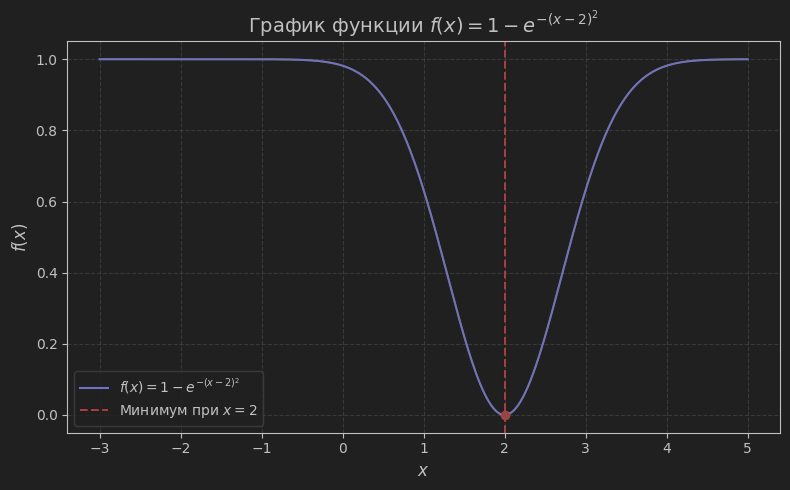
**Рис. 1.** График функции $f(x) = 1 - e^{-(x - 2)^2}$ на интервале $[-3,\ 5]$.
Функция достигает единственного минимума в точке $x = 2$. При $x \to -3$ и $x \to 5$ значение функции стремится к 1, но не достигает его.
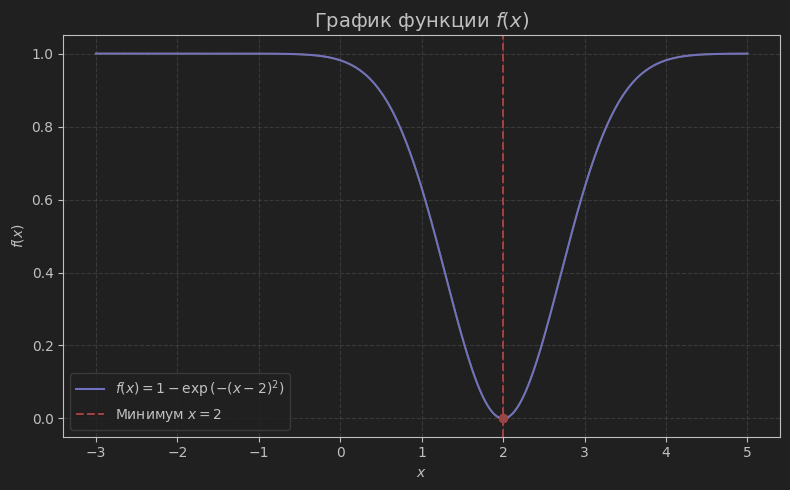
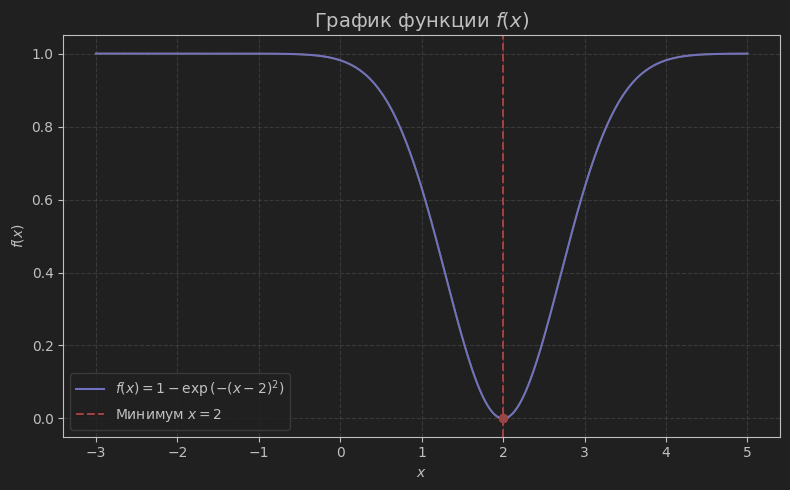

### 2. Непрерывность

Рассматриваемая функция:
$$
f(x) = 1 - e^{-(x - 2)^2}
$$

Является композицией следующих элементарных функций:

- $(x - 2)^2$ — квадрат полинома, непрерывен на всей $\mathbb{R}$;
- $e^{-t}$ — экспоненциальная функция, непрерывна при любом $t \in \mathbb{R}$;
- $1 - \cdot$ — линейное преобразование, сохраняющее непрерывность.

Композиция непрерывных функций также непрерывна.

**Следовательно, функция $f(x)$ непрерывна на всей числовой прямой:**
$$
f \in C(\mathbb{R})
$$

А значит, и на ограниченном интервале задачи:
$$
f \in C([-3,\ 5])
$$

### 3. Производная — монотонность и критические точки

Исходная функция:
$$
f(x) = 1 - e^{-(x - 2)^2}
$$

#### Первая производная

Воспользуемся правилом производной сложной функции:
$$
f'(x) = \frac{d}{dx} \left[1 - e^{-(x - 2)^2} \right] = 2(x - 2) \cdot e^{-(x - 2)^2}
$$

#### Знак производной

Так как экспонента всегда положительна:
$$
e^{-(x - 2)^2} > 0 \quad \text{при любом } x \in \mathbb{R},
$$
то знак $f'(x)$ определяется исключительно выражением $(x - 2)$:

- $f'(x) < 0$ при $x < 2$ — функция убывает;
- $f'(x) > 0$ при $x > 2$ — функция возрастает;
- $f'(2) = 0$ — производная обращается в ноль.

#### Критическая точка

Из уравнения $f'(x) = 0$:
$$
2(x - 2) \cdot e^{-(x - 2)^2} = 0 \quad \Rightarrow \quad x = 2
$$

#### Вывод
- Производная $f'(x)$ существует и непрерывна на всём $\mathbb{R}$, следовательно $f \in C^1(\mathbb{R})$;
- Функция убывает на $(-\infty, \ 2)$ и возрастает на $(2,\ +\infty)$;
- Точка $x = 2$ — единственная критическая точка, в которой достигается **строгий локальный (и глобальный) минимум** на интервале $[-3,\ 5]$.

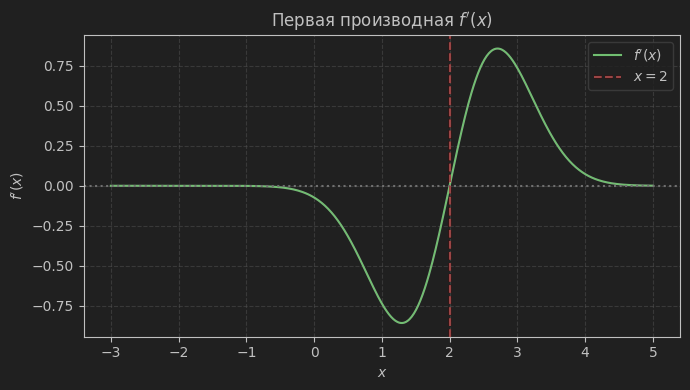

**Рис. 2.** График первой производной $f'(x)$.

Производная отрицательна при $x < 2$, положительна при $x > 2$, и обращается в ноль в точке $x = 2$, подтверждая наличие минимума. Сама $f'(x)$ непрерывна на всём интервале.

### 4. Вторая производная — выпуклость и вогнутость

Исходная функция:
$$
f(x) = 1 - e^{-(x - 2)^2}
$$

#### Первая производная (напоминание):
$$
f'(x) = 2(x - 2) \cdot e^{-(x - 2)^2}
$$

#### Вторая производная:

Применим правило производной произведения:
$$
\begin{aligned}
f''(x) &= \frac{d}{dx} \left[ 2(x - 2)\cdot e^{-(x - 2)^2} \right] \\
&= 2 \cdot e^{-(x - 2)^2} - 4(x - 2)^2 \cdot e^{-(x - 2)^2} \\
&= 2 \cdot e^{-(x - 2)^2} \cdot \left( 1 - 2(x - 2)^2 \right)
\end{aligned}
$$

#### Знак второй производной:

Так как $e^{-(x - 2)^2} > 0$ при любом $x$, знак $f''(x)$ зависит только от выражения в скобках:
$$
f''(x) \ge 0 \quad \Leftrightarrow \quad 1 - 2(x - 2)^2 \ge 0
$$

Решим неравенство:
$$
(x - 2)^2 \le \frac{1}{2}
\quad \Rightarrow \quad
|x - 2| \le \frac{1}{\sqrt{2}} \approx 0.7071
$$

Значит, функция $f(x)$ выпукла на интервале:
$$
x \in \left[ 2 - \frac{1}{\sqrt{2}},\ 2 + \frac{1}{\sqrt{2}} \right] \approx [1.2929,\ 2.7071]
$$

На остальной части отрезка $[-3,\ 5]$ функция **вогнута**.

#### Проверка точки минимума:

Подставим $x = 2$:
$$
f''(2) = 2 \cdot e^{0} \cdot (1 - 0) = 2 > 0
$$

Следовательно, $x = 2$ — точка строгого локального минимума. Это согласуется с анализом производной первого порядка.

#### Вывод:
- Функция $f(x)$ дважды дифференцируема: $f \in C^2(\mathbb{R})$.
- $f(x)$ выпукла в окрестности точки $x = 2$, и вогнута вне этого интервала.
- Поведение второй производной позволяет уточнить геометрию графика: локально $f(x)$ близка к параболе, что важно для численных методов.


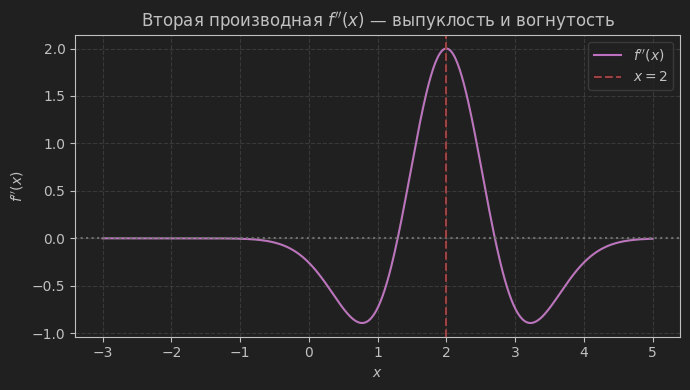

**Рис. 3.** График второй производной $f''(x)$.

Функция $f(x)$ выпукла в окрестности точки $x = 2$, где $f''(2) > 0$, и вогнута вне интервала $[1.29,\ 2.71]$. Это поведение подтверждает локальный характер выпуклости и подчёркивает гладкость функции.


### 5. Поведение около минимума — квадратичная аппроксимация

Установлено, что функция достигает минимума в точке:
$$
x = 2, \quad f(2) = 0, \quad f'(2) = 0, \quad f''(2) = 2 > 0
$$

То есть, в точке $x = 2$:
- функция гладкая ($f \in C^2$);
- производная первого порядка обращается в ноль;
- вторая производная положительна.

Это означает, что **в окрестности минимума** функция допускает квадратичную аппроксимацию — в соответствии с теоремой Тейлора второго порядка.

#### Разложение в ряд Тейлора около $x = 2$:

Разложим $f(x)$ в ряд Тейлора по степеням $(x - 2)$:

$$
\begin{aligned}
f(x) &= 1 - e^{-(x - 2)^2} = 1 - \left( 1 - (x - 2)^2 + \frac{1}{2}(x - 2)^4 - \frac{1}{6}(x - 2)^6 + \dots \right) = (x - 2)^2 - \frac{1}{2}(x - 2)^4 + \frac{1}{6}(x - 2)^6 - \dots
\end{aligned}
$$

#### Интерпретация:

В малой окрестности точки $x = 2$:

$$
f(x) \approx (x - 2)^2
$$

то есть:
- функция ведёт себя как парабола, направленная вверх;
- влияние старших членов разложения становится заметным только при удалении от точки минимума;
- численные методы, использующие производные (градиент, Ньютон и т.д.), в этой области будут сходиться особенно быстро.

#### Вывод:

- Локально функция $f(x)$ обладает **почти идеальной квадратичной формой**, что позволяет эффективно применять методы оптимизации второго порядка.
- В окрестности точки минимума $x = 2$ поведение функции устойчиво, симметрично и хорошо предсказуемо.


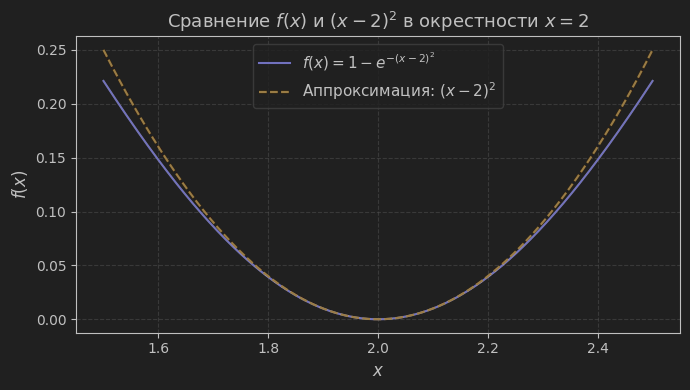

**Рис. 4.** Сравнение функции $f(x) = 1 - e^{-(x - 2)^2}$ и квадратичной аппроксимации $(x - 2)^2$ в окрестности точки $x = 2$.

Хорошее совпадение графиков подтверждает, что функция $f(x)$ локально близка к параболе и может эффективно аппроксимироваться рядом Тейлора второго порядка.
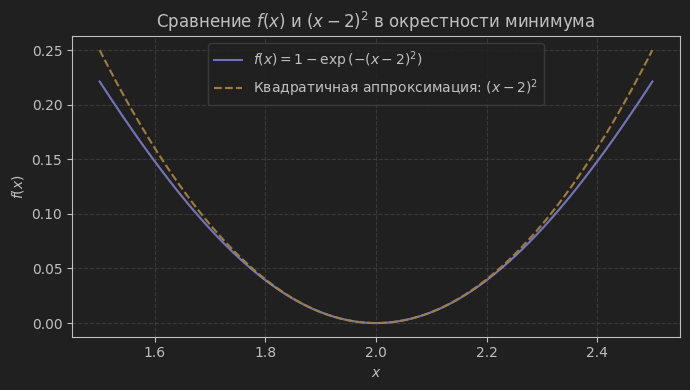

### 6. Проверка минимума с помощью SymPy

Выполним символьную проверку с использованием библиотеки `SymPy`, чтобы убедиться, что функция действительно достигает минимума в точке $x = 2$.

#### Шаг 1. Задаём выражение функции:

$$
f(x) = 1 - e^{-(x - 2)^2}
$$

#### Шаг 2. Находим первую производную $f'(x)$:

Решим уравнение $f'(x) = 0$ для поиска критических точек.

#### Шаг 3. Находим вторую производную $f''(x)$:

Проверим знак второй производной в найденной точке. Если $f''(x) > 0$, это означает, что точка — минимум.

#### Шаг 4. Вычисляем значение функции в этой точке:

Убедимся, что $f(2) = 0$, как и ожидалось из теории.

In [74]:
import sympy as sp
from IPython.display import display, Math

# Переменная и функция
x = sp.symbols('x', real=True)
f = 1 - sp.exp(-(x - 2)**2)

# Первая и вторая производные
df = sp.simplify(sp.diff(f, x))
d2f = sp.simplify(sp.diff(df, x))

# Критическая точка
crit_point = sp.solve(sp.Eq(df, 0), x)[0]

# Значения производной и функции в точке
f_val = f.subs(x, crit_point)
d2f_val = d2f.subs(x, crit_point)

# Красивый вывод
display(Math(r"f(x) = 1 - e^{-(x - 2)^2}"))
display(Math(r"f'(x) = " + sp.latex(df)))
display(Math(r"f''(x) = " + sp.latex(d2f)))
display(Math(r"\text{Критическая точка: } x = " + sp.latex(crit_point)))
display(Math(r"f''(" + sp.latex(crit_point) + ") = " + sp.latex(d2f_val) + r" > 0 \Rightarrow \text{минимум}"))
display(Math(r"f(" + sp.latex(crit_point) + ") = " + sp.latex(f_val)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 7. Итоги анализа функции

На основе проведённого теоретического и символьного анализа функции:
$$
f(x) = 1 - e^{-(x - 2)^2}, \quad x \in [-3,\ 5]
$$
можно сделать следующие выводы:

- **Область определения:**
  $f(x)$ определена на всей числовой прямой: $\text{D}(f) = \mathbb{R}$

- **Область значений на отрезке $[-3,\ 5]$:**
  $\text{E}(f) = [0,\ 1)$

- **Непрерывность и гладкость:**
  $f(x)$ — бесконечно дифференцируемая функция: $f \in C^\infty(\mathbb{R})$

- **Монотонность:**
  - убывает при $x < 2$
  - возрастает при $x > 2$
  - $x = 2$ — единственная точка минимума

- **Выпуклость:**
  - $f(x)$ выпукла на интервале $\left[2 - \frac{1}{\sqrt{2}},\ 2 + \frac{1}{\sqrt{2}}\right] \approx [1.2929,\ 2.7071]$
  - вне этого интервала — вогнута

- **Поведение около минимума:**
  $f(x)$ хорошо аппроксимируется параболой $(x - 2)^2$ в окрестности точки $x = 2$
  (по ряду Тейлора)

- **Точка минимума (аналитически):**
  $x = 2,\quad f(2) = 0,\quad f'(2) = 0,\quad f''(2) = 2 > 0$

**Вывод:**
Функция $f(x)$ удовлетворяет всем условиям для применения численных методов одномерной оптимизации.
Она гладкая, унимодальная, обладает чётко выраженным минимумом и устойчивым поведением в его окрестности.
Эти свойства делают её идеальной для демонстрации и сравнения алгоритмов дихотомии, золотого сечения и Фибоначчи.

### Базовые параметры и целевая функция

Задаём исходные данные для всех методов:

- **Интервал поиска**:
  $a = -3$, $b = 5$
- **Точность**:
  $\Delta = 10^{-4}$ — требуемая погрешность
  $\varepsilon = 10^{-5}$ — шаг между точками в методе дихотомии
- **Целевая функция**:
  $$f(x) = 1 - e^{-(x - 2)^2}$$


In [75]:
import numpy as np
from typing import Callable, Tuple, List

a = -3
b = 5

delta = 1e-4
epsilon = 1e-5

x_theoretical_min = 2.0
f_theoretical_min = 0.0

def f(x: float) -> float:
    """
    Целевая функция для минимизации:
        f(x) = 1 - exp(-(x - 2)^2)

    Аргументы:
    ----------
    x : float
        Точка, в которой вычисляется значение функции.

    Возвращает:
    -----------
    float
        Значение функции f(x).
    """
    return 1 - np.exp(-(x - 2)**2)


## Задание 1. Метод дихотомии

**Цель:**  Найти минимум функции
$$
f(x) = 1 - e^{-(x - 2)^2}
$$
на интервале $[-3;\ 5]$ с заданной точностью $\Delta = 10^{-4}$  при помощи **метода дихотомии**.

### Теоретическая справка

Метод дихотомии используется для нахождения минимума **унимодальной функции**.
На каждом шаге интервал $[a, b]$ сужается с помощью двух точек:

- $x_1 = \dfrac{a + b - \varepsilon}{2}$
- $x_2 = \dfrac{a + b + \varepsilon}{2}$

Значение $\varepsilon > 0$ позволяет различить точки $x_1$ и $x_2$.

После вычисления значений $f(x_1)$ и $f(x_2)$ выбирается новый интервал, где заведомо содержится минимум:

- если $f(x_1) < f(x_2)$, то $[a, x_2]$;
- если $f(x_1) > f(x_2)$, то $[x_1, b]$;
- если $f(x_1) = f(x_2)$, то $[x_1, x_2]$.

### Как сужается интервал?

Пусть $L_0 = b - a$ — начальная длина интервала. Тогда:

- После **первого шага** (двух измерений):
  $$
  L_2 = \frac{L_0}{2} + \frac{\varepsilon}{2}
  $$

- После **двух итераций (четырёх измерений)**:
  $$
  L_4 = \frac{L_0}{4} + \frac{3\varepsilon}{4}
  $$

- После **$N$ измерений**:
  $$
  L_{2N} = \frac{L_0}{2^N} + \left(1 - \frac{1}{2^N}\right)\varepsilon
  $$

Процесс продолжается до тех пор, пока длина интервала не станет меньше заданной точности $\Delta$.


In [76]:
def dichotomy_method(
    f: Callable[[float], float],
    a: float,
    b: float,
    delta: float,
    epsilon: float = 1e-5,
    verbose: bool = False
) -> Tuple[float, float, int, List[Tuple[float, float]], float, float]:
    """
    Метод дихотомии для поиска минимума унимодальной функции f(x) на отрезке [a, b].

    Аргументы:
    ----------
    f : Callable[[float], float]
        Функция, минимум которой требуется найти.
    a : float
        Левая граница интервала поиска.
    b : float
        Правая граница интервала поиска.
    delta : float
        Требуемая точность (максимально допустимая длина финального интервала).
    epsilon : float, по умолчанию 1e-5
        Малое положительное число для смещения точек x₁ и x₂ относительно середины интервала.
    verbose : bool, по умолчанию False
        Если True — выводит шаги алгоритма на каждом шаге.

    Возвращает:
    -----------
    Tuple[
        float,  # x_min — оценка точки минимума
        float,  # f_min — значение функции в найденной точке
        int,    # n_iter — количество вычислений функции
        List[Tuple[float, float]],  # history — история изменения интервалов
        float,  # error_x — фактическая погрешность по аргументу |x̂ - 2|
        float   # error_f — фактическая погрешность по значению |f(x̂) - 0|
    ]
    """
    n_iter = 0
    history = []

    while (b - a) / 2 > delta:
        x1 = (a + b - epsilon) / 2
        x2 = (a + b + epsilon) / 2
        f1 = f(x1)
        f2 = f(x2)
        n_iter += 2
        history.append((a, b))

        if verbose:
            print(f"[{a:.5f}, {b:.5f}]  x1 = {x1:.5f}, f1 = {f1:.5e} | x2 = {x2:.5f}, f2 = {f2:.5e}")

        if f1 < f2:
            b = x2
        else:
            a = x1

    x_min = (a + b) / 2
    f_min = f(x_min)

    error_x = abs(x_min - x_theoretical_min)
    error_f = abs(f_min - f_theoretical_min)

    return x_min, f_min, n_iter, history, error_x, error_f


In [87]:
_, _, _, history, _, _ = dichotomy_method(f, a, b, delta, epsilon, verbose=False)

print("История сужения интервала N0–N12:")
iter_0_12 = list(range(0, 13, 2))

for n, (a_i, b_i) in zip(iter_0_12, history[:len(iter_0_12)]):
    print(f"Итерация N{n:<2}:  [a = {a_i:.6f},  b = {b_i:.6f}]   Δ = {(b_i - a_i):.6e}")

История сужения интервала N0–N12:
Итерация N0 :  [a = -3.000000,  b = 5.000000]   Δ = 8.000000e+00
Итерация N2 :  [a = 0.999995,  b = 5.000000]   Δ = 4.000005e+00
Итерация N4 :  [a = 0.999995,  b = 3.000002]   Δ = 2.000007e+00
Итерация N6 :  [a = 1.999994,  b = 3.000002]   Δ = 1.000009e+00
Итерация N8 :  [a = 1.999994,  b = 2.500003]   Δ = 5.000094e-01
Итерация N10:  [a = 1.999994,  b = 2.250003]   Δ = 2.500097e-01
Итерация N12:  [a = 1.999994,  b = 2.125004]   Δ = 1.250098e-01


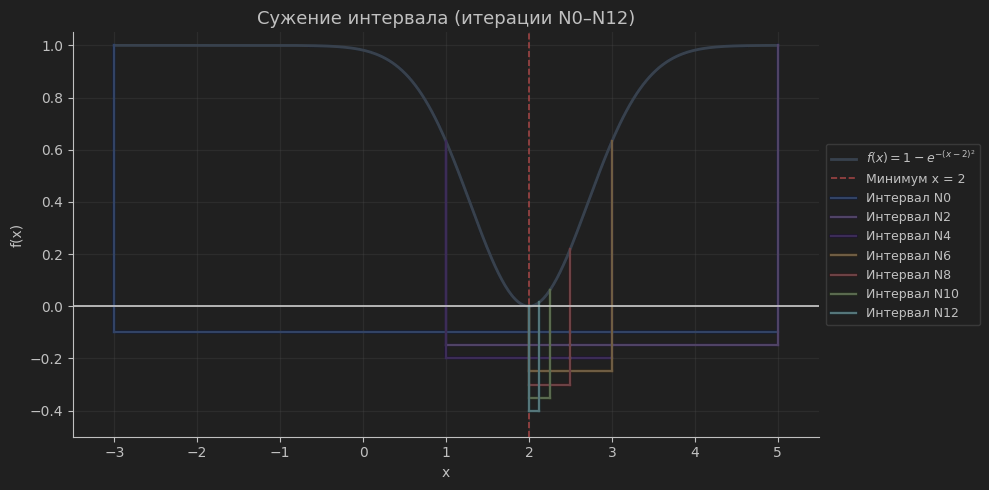

In [89]:
print("История сужения интервала N14–N20:")

iter_14_20 = list(range(14, 21, 2))
start_idx = len(iter_0_12)

for n, (a_i, b_i) in zip(iter_14_20, history[start_idx:start_idx + len(iter_14_20)]):
    print(f"Итерация N{n:<2}:  [a = {a_i:.6f},  b = {b_i:.6f}]   Δ = {(b_i - a_i):.6e}")


История сужения интервала N14–N20:
Итерация N14:  [a = 1.999994,  b = 2.062504]   Δ = 6.250992e-02
Итерация N16:  [a = 1.999994,  b = 2.031254]   Δ = 3.125996e-02
Итерация N18:  [a = 1.999994,  b = 2.015629]   Δ = 1.563498e-02
Итерация N20:  [a = 1.999994,  b = 2.007816]   Δ = 7.822490e-03


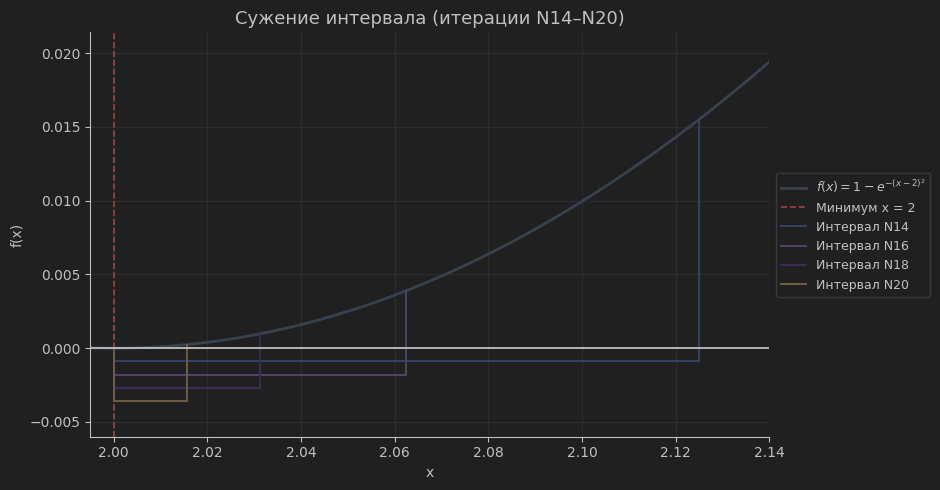

In [90]:
print("История сужения интервала N22–N30:")

iter_22_30 = list(range(22, 31, 2))
start_idx = len(iter_0_12) + len(iter_14_20)

for n, (a_i, b_i) in zip(iter_22_30, history[start_idx:start_idx + len(iter_22_30)]):
    print(f"Итерация N{n:<2}:  [a = {a_i:.6f},  b = {b_i:.6f}]   Δ = {(b_i - a_i):.6e}")

История сужения интервала N22–N30:
Итерация N22:  [a = 1.999994,  b = 2.003910]   Δ = 3.916245e-03
Итерация N24:  [a = 1.999994,  b = 2.001957]   Δ = 1.963123e-03
Итерация N26:  [a = 1.999994,  b = 2.000980]   Δ = 9.865613e-04
Итерация N28:  [a = 1.999994,  b = 2.000492]   Δ = 4.982806e-04
Итерация N30:  [a = 1.999994,  b = 2.000248]   Δ = 2.541403e-04


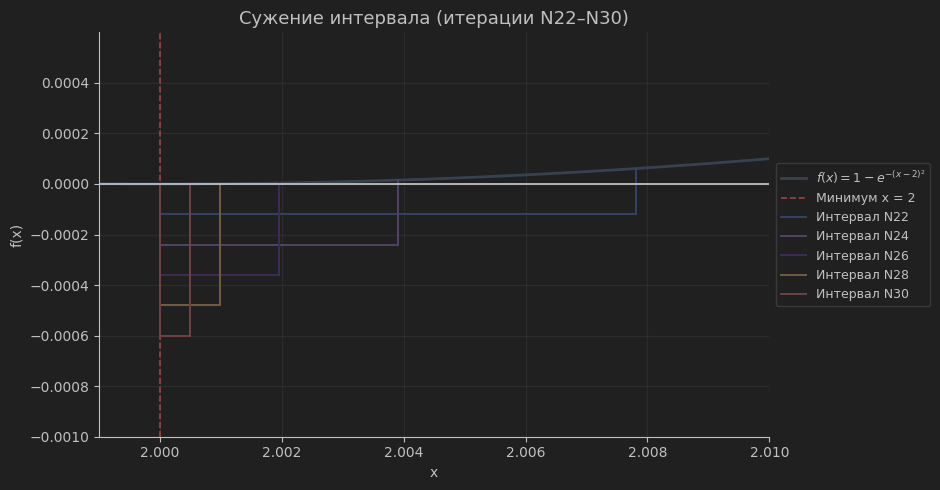